In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
#결정 트리 시각화

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

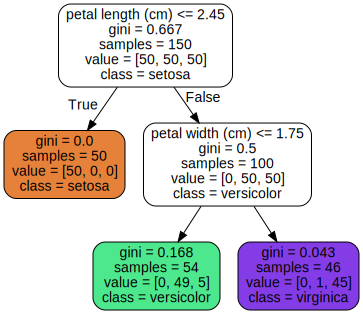

In [14]:
from graphviz import Source

#여기서 오류 발생시 Graphviz 윈도우 msi 인스톨러 다운로드 및 설치 후
#C:\Program Files (x86)\Graphviz2.38\bin 를 시스템 환경 변수에 추가 하고 커맨드 창부터 재시작
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

예측을 루트 노드에서 부터 시작

꽃잎의 길이가 2.45cm보다 짧은지 검사.

만약 그렇다면 왼쪽 자식노드로 이동. 이 노드가 리프노드 이므로 추가 검사 없이 품종은 setosa


꽃잎의 길이가 2.45cm보다 긴 꽃 발견시 오른쪽 자식 노드로 이동

리프노드가 아니므로 추가로 꽃잎의 너비가 1.75cm보다 작은지 검사

만약 작다면 왼쪽 노드로 이동하여 품종은 cersicolor

결정 트리의 장점은 데이터 전처리가 거의 필요 없으며, 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업 불필요

- 노드의 samples속성은 얼마나 많은 훈련 샘플이 적용되었는지 나타낸다.  
100개의 훈련 샘플의 꽃잎 길이가 2.45cm보다 길고 그 중 54개의 샘플의 경우 꽃잎 너비가 1.75cm보다 짧음.


- value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.  
맨 오른쪽 노드의 경우 setosa가 0개, versicolor가 1개, virginica 45개가 있음을 알 수 있다.


- gini속성은 불순도를 나타내는데, 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 함  
맨 왼쪽 노드가 순수한 노드


- 사이킷런은 이진 트리를 만드는 CART알고리즘 사용으로 자식을 두 개씩 가짐

그림 저장: decision_tree_decision_boundaries_plot


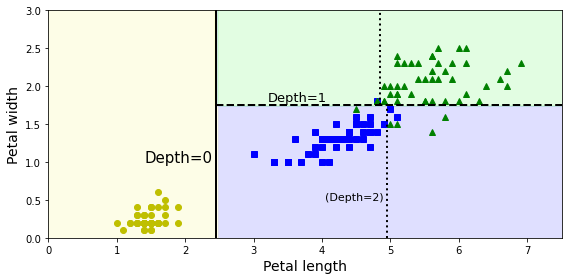

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) #x축의 입력 값은 꽃잎 길이
    x2s = np.linspace(axes[2], axes[3], 100) #y축의 입력 값은 꽃잎 너비
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] #두 개의 입력값을 하나로
    y_pred = clf.predict(X_new).reshape(x1.shape) #x, y축 입력 값에 대응하는 예측 값
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

왼쪽 경계는 순수노드이므로 더 나눌 수가 없고

오른쪽은 꽃잎 너비 1.75cm에서 나누어진다

max_depth를 3으로 설정하면 2의 두 노드가 각각 결정 경계를 추가로 만든다.(점선)

In [22]:
#클래스 확률 추정

tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

CART 알고리즘은 탐욕적 알고리즘. 종종 납득할만한 훌륭한 솔루션을 만들지만 최적의 솔루션을 보장하지 않는다.

예측은 특성과 무관하게 O(log2(m))이다. 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다.

훈련 알고리즘은 O(n x mlog(m))

- 결정 트리는 훈련 전에 모델 파라미터가 결정되지 않음. 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유로움

- 선형 모델 같은 파라미터 모델은 미리 정의된 파라미터 수를 가지므로 자유도가 제한되고 과대적합의 위험 적음(과소적합 위험 큼)

# 훈련 세트에 민감함(규제 적용)

In [29]:
widest_index = (X[:, 1]==X[:, 1][y==1].max()) #꽃 너비가 가장 넓은 것만 추려보면
widest_index, y[widest_index]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False,  True,
         True, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False,  True, False,  True,
      

In [28]:
X[widest_index & (y==1)] #versicolor 꽃 중에 가장 넓은 꽃

array([[4.8, 1.8]])

In [32]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

그림 저장: decision_tree_instability_plot


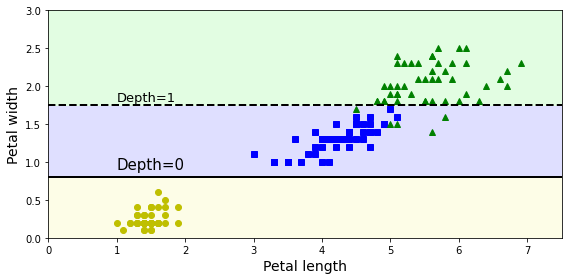

In [33]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

그림 저장: min_samples_leaf_plot


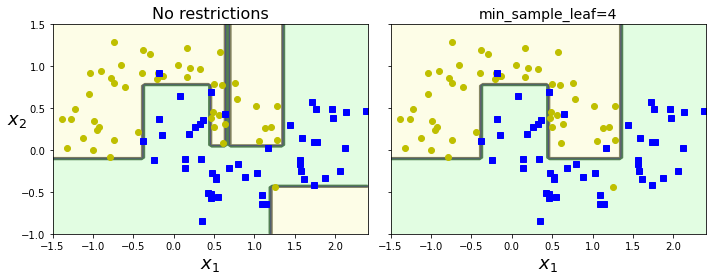

In [36]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42) #리프 노드가 가져야할 최소 샘플 수
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title(f"min_sample_leaf={deep_tree_clf2.min_samples_leaf}", fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

왼쪽 모델은 과대 적합 되었지만, 오른쪽 모델은 일반화 성능이 더 뛰어날 것으로 판단

# 회귀

결증 트리는 회귀 문제에서 사용할 수 있다

In [41]:
np.random.seed(42)

m=200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

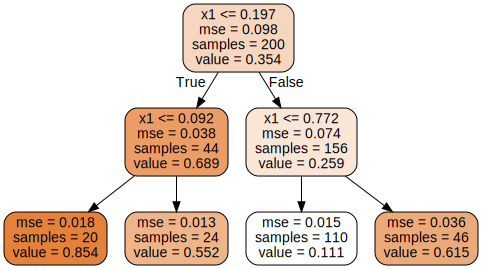

In [47]:
#결정 트리 시각화

from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "iris_reg_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
#여기서 오류 발생시 Graphviz 윈도우 msi 인스톨러 다운로드 및 설치 후
#C:\Program Files (x86)\Graphviz2.38\bin 를 시스템 환경 변수에 추가 하고 커맨드 창부터 재시작
Source.from_file(os.path.join(IMAGES_PATH, "iris_reg_tree.dot"))

클래스를 예측 하는 대신에 값을 예측 함.

x1 = 0.6인 샘플을 예측 -> 루트(x1 > 0.197) : False -> (x1 <= 0.772) : True -> 예측 결과 0.111

이 예측 값에는 샘플이 110개 있으면, 평균제곱오차(MSE)는 0.015

그림 저장: tree_regression_regularization_plot


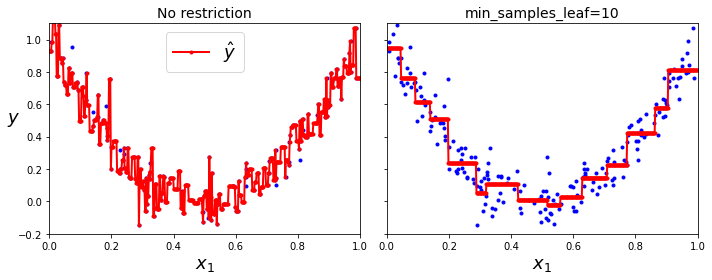

In [49]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label="$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restriction", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label="$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}", fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

min_samples_leaf=10으로 지정하여 훨씬 그럴싸한 모델 생성

결정 트리는 이해하기 해석하기 쉽고, 사용하기 편하며, 성능도 뛰어나다. 하지만 훈련 데이터 세트의 회전에 민감하다.

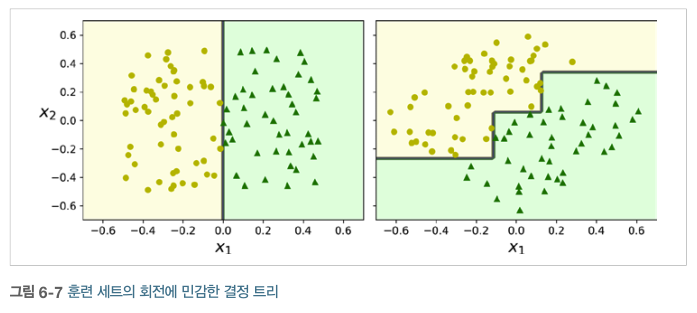

오른쪽 트리는 일반화 어려울 것으로 예상. 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법 사용 가능

랜덤 포레스트는 많은 트리에서 만든 예측을 평균화하여 이런 불안정성 극복 가능

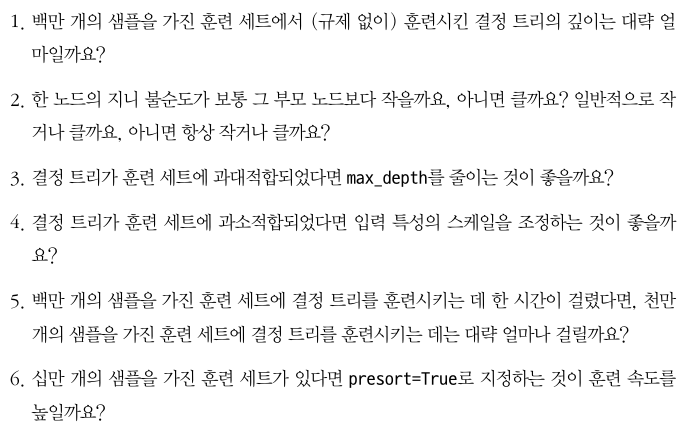

1. m개의 리프 노드를 포함한 이진 트리의 깊이는 log2(m)을 반올림 한 것.  
   100만개의 샘플이라면 log2(10**6) = 20이 될 것.
   

2. 한 노드의 지니 불순도는 일반적으로 부모의 불순도 보다 낮다. 자식의 지니 불순도 가중치의 합이 최소화 되는 방향으로 분할하는 CART 훈련 알고리즘의 비용함수 때문


3. 과대 적합이라면 모델에 제약을 가해 규제해야 하므로 max_depth를 낮추는 게 좋다


4. 결정 트리는 훈련 데이터의 스케일이나 원점에 영향받지 않음. 시간낭비


5. 대략 11.7시간


6. 샘플 수가 수천 개 미만일 때, 사전 정렬로 훈련 속도 높일 수 있음. 십만개 라면 매우 느려질 것.

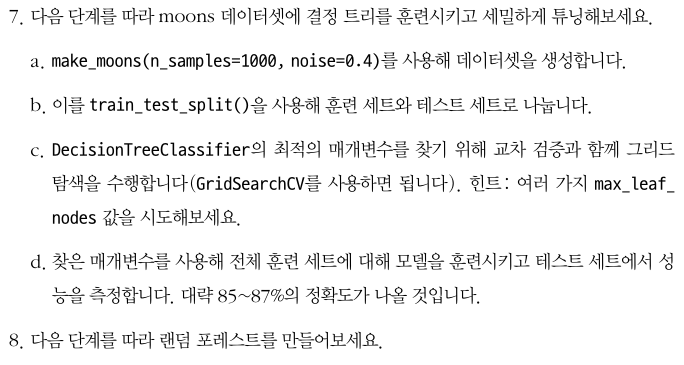
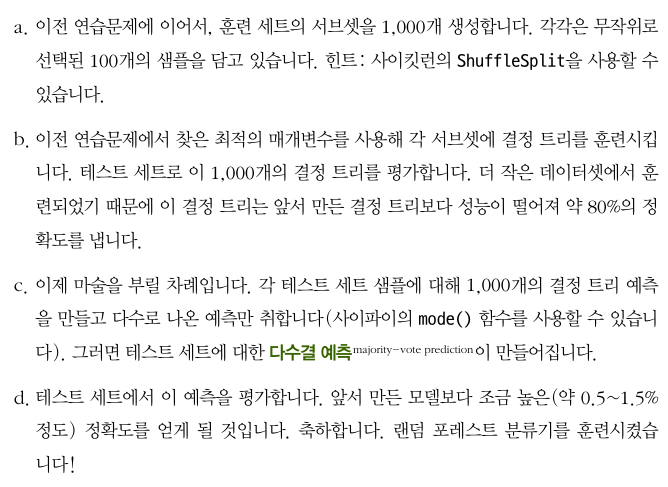

In [1]:
# 연습문제 7

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [2]:
#훈련 세트와 테스트 세트로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [5]:
#교차 검층과 그리드 탐색

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_leaf_nodes' : list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.4s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [6]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [8]:
#전체 훈련 세트에 대해서 모델 훈련 후 테스트 세트에서 성능 측정

#GridSearchCS는 전체 훈련 세트로 찾은 최적의 모델을 다시 훈련 시킴

from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [12]:
# 연습문제 8

#이전 연습문제에 이어서 훈련 세트의 서브셋은 1000개 생성, 각각은 무작위로 선택된 100개의 샘플을 담고 있음

from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

ss = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in ss.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    print(X_mini_train.shape, y_mini_train.shape)
    mini_sets.append((X_mini_train, y_mini_train))

print(len(mini_sets))

(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2)

(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2)

In [13]:
# 앞에서 찾은 최적의 매개변수로 각 서브셋에 결정 트리를 훈련

from sklearn.base import clone
import numpy as np

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

In [14]:
#각 테스트 세트 샘플에 대해 각각 결정 트리 예측을 만들어 1000개의 예측을 모은 뒤에 다수로 나온 예측만 취합한다.
#그러면 테스트 세트에 대한 다수결 예측이 만들어 진다.

y_preds = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    y_preds[tree_index] = tree.predict(X_test)    

In [16]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(y_preds, axis=0) #행 방향으로 가장 흔하게 발견되는 값만 추린다.

y_pred_majority_votes.shape

(1, 2000)

In [18]:
accuracy_score(y_test, y_pred_majority_votes.ravel())

0.872